# Cluster Analysis and Membership Functions

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('indiancrop_dataset.csv')
df = pd.DataFrame(data)
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


## Identifying the number of clusters 

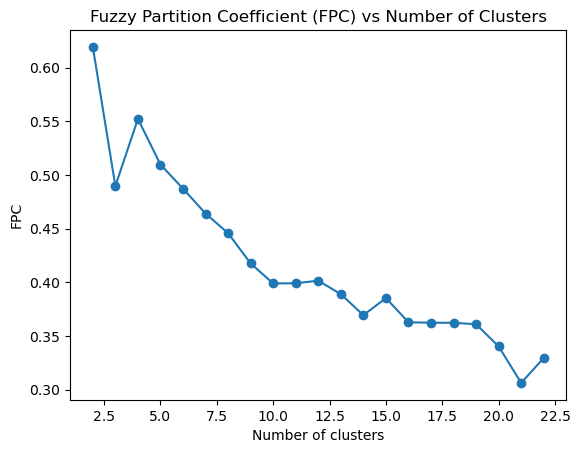

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Assuming 'data_without_crop' contains your environmental factors
data_without_crop = df[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL']].values.T

# Define a range of cluster numbers to try
cluster_range = range(2, 23)  # Try between 2 and 22 clusters

fpc_values = []

# Apply FCM with different numbers of clusters
for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_without_crop, c=c, m=2, error=0.005, maxiter=1000)
    
    # Store the FPC (Fuzzy Partition Coefficient) for each c
    fpc_values.append(fpc)

# Plot the FPC to find the "elbow" point
plt.plot(cluster_range, fpc_values, marker='o')
plt.title('Fuzzy Partition Coefficient (FPC) vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('FPC')
plt.show()


In [11]:
import numpy as np
import skfuzzy as fuzz

# Assuming 'data' is your pandas DataFrame with the relevant environmental factors
data_without_crop = data[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL']].values.T

# Apply Fuzzy C-Means clustering with 5 clusters
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_without_crop, c=5, m=2, error=0.005, maxiter=1000, init=None)

# 'cntr' contains the cluster centers (centroids)
# 'u' is the membership matrix showing how much each point belongs to each cluster

# Get the cluster membership for each crop
cluster_membership = np.argmax(u, axis=0)
df['Cluster'] = cluster_membership

In [12]:
df['Cluster'].unique()

array([4, 1, 2, 3, 0], dtype=int64)

## Cluster analysis

In [13]:
# Print the cluster centers (centroids) for the 5 clusters
print("Cluster Centers (Centroids):")
print(cntr)


Cluster Centers (Centroids):
[[ 22.46367518 132.4299602  198.02044768  23.23738186  86.68363319
    5.98512747  91.41476118]
 [ 29.61706824  58.15736134  24.0940888   26.84982491  61.57685522
    6.76623314  63.65272761]
 [ 27.61300679  31.0379073   29.43069801  25.03099449  74.87486666
    6.39507236 111.21523005]
 [ 97.66105707  35.49293384  39.06980353  25.66449642  80.38515402
    6.52183599  64.50058182]
 [ 70.06100297  44.86058365  37.78301057  25.94266004  77.96018292
    6.52095354 192.09435668]]


### Applying Fuzzy Logic

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Create fuzzy variables for inputs
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
ph = ctrl.Antecedent(np.arange(3, 10, 0.1), 'ph')
rainfall = ctrl.Antecedent(np.arange(0, 500, 1), 'rainfall')
n_soil = ctrl.Antecedent(np.arange(0, 150, 1), 'n_soil')
p_soil = ctrl.Antecedent(np.arange(0, 150, 1), 'p_soil')
k_soil = ctrl.Antecedent(np.arange(0, 150, 1), 'k_soil')

# List of crops
crops = ['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas', 'MothBeans', 
         'MungBean', 'Blackgram', 'Lentil', 'Pomegranate', 'Banana', 'Mango', 
         'Grapes', 'Watermelon', 'Muskmelon', 'Apple', 'Orange', 'Papaya', 
         'Coconut', 'Cotton', 'Jute', 'Coffee']

# Create fuzzy output variables for each crop
crop_outputs = {}
for crop in crops:
    crop_outputs[crop] = ctrl.Consequent(np.arange(0, 10, 1), crop)
    crop_outputs[crop]['low'] = fuzz.trimf(crop_outputs[crop].universe, [0, 0, 5])
    crop_outputs[crop]['high'] = fuzz.trimf(crop_outputs[crop].universe, [5, 10, 10])

# Define custom membership functions for temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['moderate'] = fuzz.trimf(temperature.universe, [10, 25, 40])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])

# Define custom membership functions for humidity
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# Define custom membership functions for pH
ph['acidic'] = fuzz.trimf(ph.universe, [3, 3, 6])
ph['neutral'] = fuzz.trimf(ph.universe, [5, 7, 9])
ph['alkaline'] = fuzz.trimf(ph.universe, [7, 10, 10])

# Define custom membership functions for rainfall
rainfall['low'] = fuzz.trimf(rainfall.universe, [0, 0, 200])
rainfall['medium'] = fuzz.trimf(rainfall.universe, [100, 250, 400])
rainfall['high'] = fuzz.trimf(rainfall.universe, [300, 500, 500])

# Define custom membership functions for soil nutrients (N, P, K)
n_soil['poor'] = fuzz.trimf(n_soil.universe, [0, 0, 50])
n_soil['average'] = fuzz.trimf(n_soil.universe, [30, 75, 120])
n_soil['rich'] = fuzz.trimf(n_soil.universe, [100, 150, 150])

p_soil['poor'] = fuzz.trimf(p_soil.universe, [0, 0, 50])
p_soil['average'] = fuzz.trimf(p_soil.universe, [30, 75, 120])
p_soil['rich'] = fuzz.trimf(p_soil.universe, [100, 150, 150])

k_soil['poor'] = fuzz.trimf(k_soil.universe, [0, 0, 50])
k_soil['average'] = fuzz.trimf(k_soil.universe, [30, 75, 120])
k_soil['rich'] = fuzz.trimf(k_soil.universe, [100, 150, 150])

# Updated rules with temperature, humidity, rainfall, pH, n_soil, p_soil, k_soil

# 1. Rice: Requires hot temperatures, high humidity, high rainfall, and nutrient-rich soil with neutral pH
rule_rice = ctrl.Rule(temperature['hot'] & humidity['high'] & rainfall['high'] & ph['neutral'] & n_soil['rich'] & p_soil['rich'] & k_soil['rich'], crop_outputs['Rice']['high'])

# 2. Maize: Prefers moderate temperatures, medium rainfall, neutral pH, and average nutrient soil
rule_maize = ctrl.Rule(temperature['moderate'] & humidity['medium'] & rainfall['medium'] & ph['neutral'] & n_soil['average'] & p_soil['average'] & k_soil['average'], crop_outputs['Maize']['high'])

# 3. ChickPea: Thrives in moderate temperatures, low humidity, low rainfall, and slightly neutral to alkaline pH with average nutrients
rule_chickpea = ctrl.Rule(temperature['moderate'] & humidity['low'] & rainfall['low'] & ph['alkaline'] & n_soil['average'] & p_soil['average'] & k_soil['average'], crop_outputs['ChickPea']['high'])

# 4. KidneyBeans: Prefers moderate temperatures, medium rainfall, neutral pH, and nutrient-rich soil
rule_kidneybeans = ctrl.Rule(temperature['moderate'] & humidity['medium'] & rainfall['medium'] & ph['neutral'] & n_soil['rich'] & p_soil['rich'] & k_soil['average'], crop_outputs['KidneyBeans']['high'])

# 5. PigeonPeas: Grows well in hot temperatures, low humidity, low rainfall, slightly acidic pH, and low-nutrient soil
rule_pigeonpeas = ctrl.Rule(temperature['hot'] & humidity['low'] & rainfall['low'] & ph['acidic'] & n_soil['poor'] & p_soil['poor'] & k_soil['poor'], crop_outputs['PigeonPeas']['high'])

# 6. MothBeans: Thrives in hot, dry climates, low rainfall, acidic pH, and low-nutrient soil
rule_mothbeans = ctrl.Rule(temperature['hot'] & humidity['low'] & rainfall['low'] & ph['acidic'] & n_soil['poor'] & p_soil['poor'] & k_soil['poor'], crop_outputs['MothBeans']['high'])

# 7. MungBean: Requires hot temperatures, medium humidity, medium rainfall, neutral pH, and average nutrient soil
rule_mungbean = ctrl.Rule(temperature['hot'] & humidity['medium'] & rainfall['medium'] & ph['neutral'] & n_soil['average'] & p_soil['average'] & k_soil['average'], crop_outputs['MungBean']['high'])

# 8. Blackgram: Grows best in hot temperatures, medium humidity, medium rainfall, neutral pH, and average nutrient soil
rule_blackgram = ctrl.Rule(temperature['hot'] & humidity['medium'] & rainfall['medium'] & ph['neutral'] & n_soil['average'] & p_soil['average'] & k_soil['average'], crop_outputs['Blackgram']['high'])

# 9. Lentil: Thrives in moderate temperatures, low humidity, low rainfall, slightly alkaline pH, and poor soil nutrients
rule_lentil = ctrl.Rule(temperature['moderate'] & humidity['low'] & rainfall['low'] & ph['alkaline'] & n_soil['poor'] & p_soil['average'] & k_soil['poor'], crop_outputs['Lentil']['high'])

# 10. Pomegranate: Prefers hot temperatures, low humidity, low rainfall, neutral pH, and average soil nutrients
rule_pomegranate = ctrl.Rule(temperature['hot'] & humidity['low'] & rainfall['low'] & ph['neutral'] & n_soil['average'] & p_soil['average'] & k_soil['average'], crop_outputs['Pomegranate']['high'])

# 11. Banana: Requires hot temperatures, high humidity, high rainfall, neutral pH, and nutrient-rich soil
rule_banana = ctrl.Rule(temperature['hot'] & humidity['high'] & rainfall['high'] & ph['neutral'] & n_soil['rich'] & p_soil['rich'] & k_soil['rich'], crop_outputs['Banana']['high'])

# 12. Mango: Prefers hot climates, medium rainfall, neutral pH, and nutrient-rich soil
rule_mango = ctrl.Rule(temperature['hot'] & humidity['medium'] & rainfall['medium'] & ph['neutral'] & n_soil['rich'] & p_soil['rich'] & k_soil['rich'], crop_outputs['Mango']['high'])

# 13. Grapes: Thrives in moderate temperatures, medium rainfall, neutral pH, and average nutrient soil
rule_grapes = ctrl.Rule(temperature['moderate'] & humidity['medium'] & rainfall['medium'] & ph['neutral'] & n_soil['average'] & p_soil['average'] & k_soil['average'], crop_outputs['Grapes']['high'])

# 14. Watermelon: Prefers hot, dry climates, low rainfall, slightly acidic pH, and poor nutrient soil
rule_watermelon = ctrl.Rule(temperature['hot'] & humidity['low'] & rainfall['low'] & ph['acidic'] & n_soil['poor'] & p_soil['poor'] & k_soil['poor'], crop_outputs['Watermelon']['high'])

# 15. Muskmelon: Requires hot temperatures, low rainfall, neutral pH, and average soil nutrients
rule_muskmelon = ctrl.Rule(temperature['hot'] & humidity['low'] & rainfall['low'] & ph['neutral'] & n_soil['average'] & p_soil['average'] & k_soil['average'], crop_outputs['Muskmelon']['high'])

# 16. Apple: Grows best in cold climates, medium rainfall, slightly acidic pH, and average nutrient soil
rule_apple = ctrl.Rule(temperature['cold'] & humidity['medium'] & rainfall['medium'] & ph['acidic'] & n_soil['average'] & p_soil['average'] & k_soil['average'], crop_outputs['Apple']['high'])

# 17. Orange: Prefers moderate temperatures, medium rainfall, neutral pH, and average soil nutrients
rule_orange = ctrl.Rule(temperature['moderate'] & humidity['medium'] & rainfall['medium'] & ph['neutral'] & n_soil['average'] & p_soil['average'] & k_soil['average'], crop_outputs['Orange']['high'])

# 18. Papaya: Requires hot temperatures, high humidity, high rainfall, neutral pH, and nutrient-rich soil
rule_papaya = ctrl.Rule(temperature['hot'] & humidity['high'] & rainfall['high'] & ph['neutral'] & n_soil['rich'] & p_soil['rich'] & k_soil['rich'], crop_outputs['Papaya']['high'])

# 19. Coconut: Thrives in hot, tropical climates with high rainfall, neutral pH, and nutrient-rich soil
rule_coconut = ctrl.Rule(temperature['hot'] & humidity['high'] & rainfall['high'] & ph['neutral'] & n_soil['rich'] & p_soil['rich'] & k_soil['rich'], crop_outputs['Coconut']['high'])

# 20. Cotton: Requires hot temperatures, low rainfall, neutral pH, and nutrient-rich soil
rule_cotton = ctrl.Rule(temperature['hot'] & humidity['low'] & rainfall['low'] & ph['neutral'] & n_soil['rich'] & p_soil['rich'] & k_soil['rich'], crop_outputs['Cotton']['high'])

# 21. Jute: Prefers hot, humid climates, high rainfall, neutral pH, and nutrient-rich soil
rule_jute = ctrl.Rule(temperature['hot'] & humidity['high'] & rainfall['high'] & ph['neutral'] & n_soil['rich'] & p_soil['rich'] & k_soil['rich'], crop_outputs['Jute']['high'])

# 22. Coffee: Requires moderate temperatures, medium rainfall, neutral pH, and nutrient-rich soil
rule_coffee = ctrl.Rule(temperature['moderate'] & humidity['medium'] & rainfall['medium'] & ph['neutral'] & n_soil['rich'] & p_soil['rich'] & k_soil['rich'], crop_outputs['Coffee']['high'])


# Add more rules for other crops as needed

# Control system for each crop
rules = [
    rule_rice,
    rule_maize,
    rule_chickpea,
    rule_kidneybeans,
    rule_pigeonpeas,
    rule_mothbeans,
    rule_mungbean,
    rule_blackgram,
    rule_lentil,
    rule_pomegranate,
    rule_banana,
    rule_mango,
    rule_grapes,
    rule_watermelon,
    rule_muskmelon,
    rule_apple,
    rule_orange,
    rule_papaya,
    rule_coconut,
    rule_cotton,
    rule_jute,
    rule_coffee
] # Add all your crop rules here
crop_ctrl = ctrl.ControlSystem(rules)
crop_sim = ctrl.ControlSystemSimulation(crop_ctrl)

# Input values (make sure the inputs exactly match the labels you defined)
crop_sim.input['temperature'] = 25
crop_sim.input['humidity'] = 50
crop_sim.input['ph'] = 7
crop_sim.input['rainfall'] = 250
crop_sim.input['n_soil'] = 130  # Input must match label 'n_soil'
crop_sim.input['p_soil'] = 155  # Input must match label 'p_soil'
crop_sim.input['k_soil'] = 75  # Input must match label 'k_soil'

# Compute the output for the rules
crop_sim.compute()

# Print the suitability score for each crop
crop_scores = {}
for crop in crops:
    try:
        crop_scores[crop] = crop_sim.output[crop]
    except KeyError:
        crop_scores[crop] = "No Rule Applied"  # In case a rule hasn't been defined for the crop yet

print(crop_scores)

# Check if any crop has a valid rule applied
valid_crops = [crop for crop in crops if crop_scores[crop] != "No Rule Applied"]

if valid_crops:
    # Find the crop with the highest suitability score among the valid crops
    best_crop = max(valid_crops, key=lambda x: crop_scores[x])
    print(f"The recommended crop to grow is {best_crop}.")
else:
    # If no valid crop found, print the message
    print("No crop suitable in the list.")



{'Rice': 'No Rule Applied', 'Maize': 'No Rule Applied', 'ChickPea': 'No Rule Applied', 'KidneyBeans': 7.6000000000000005, 'PigeonPeas': 'No Rule Applied', 'MothBeans': 'No Rule Applied', 'MungBean': 'No Rule Applied', 'Blackgram': 'No Rule Applied', 'Lentil': 'No Rule Applied', 'Pomegranate': 'No Rule Applied', 'Banana': 'No Rule Applied', 'Mango': 'No Rule Applied', 'Grapes': 'No Rule Applied', 'Watermelon': 'No Rule Applied', 'Muskmelon': 'No Rule Applied', 'Apple': 'No Rule Applied', 'Orange': 'No Rule Applied', 'Papaya': 'No Rule Applied', 'Coconut': 'No Rule Applied', 'Cotton': 'No Rule Applied', 'Jute': 'No Rule Applied', 'Coffee': 'No Rule Applied'}
The recommended crop to grow is KidneyBeans.


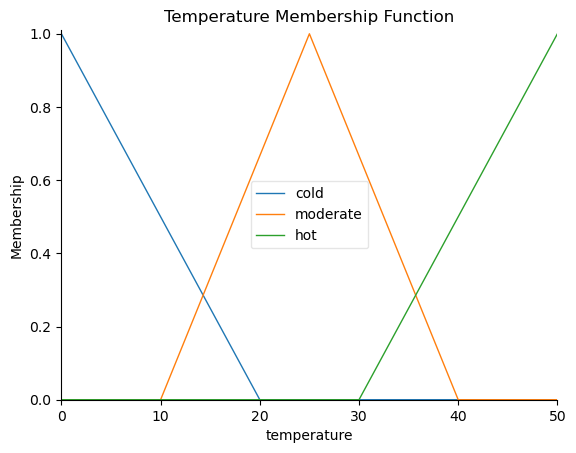

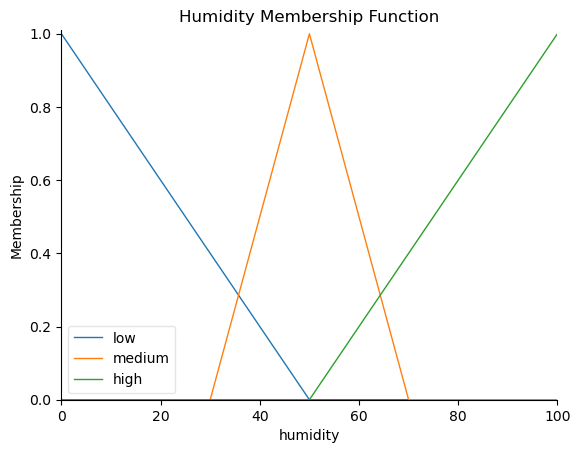

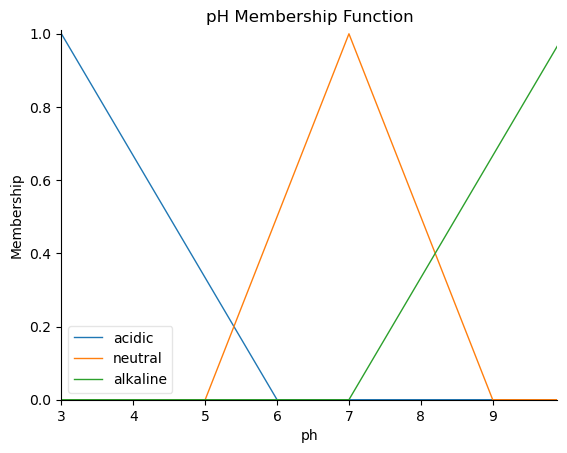

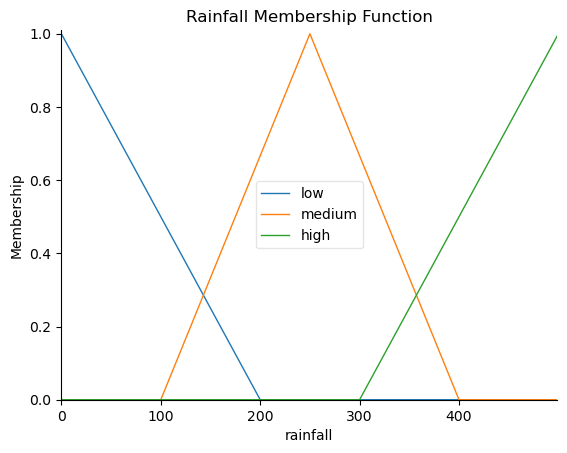

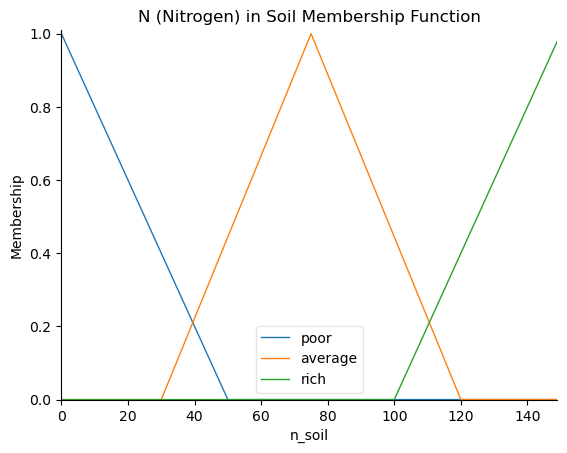

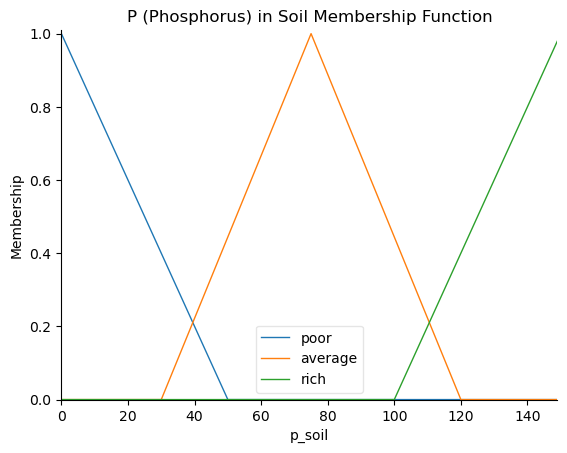

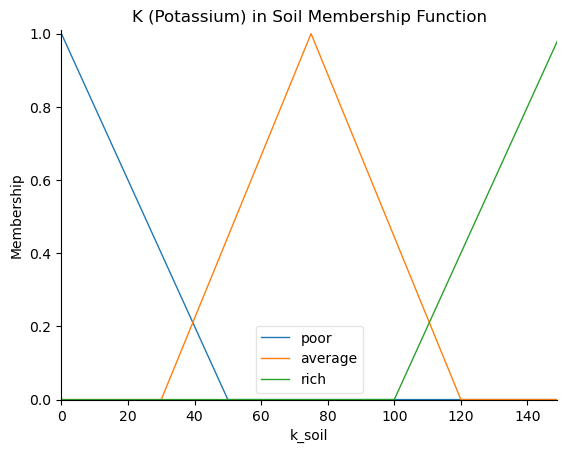

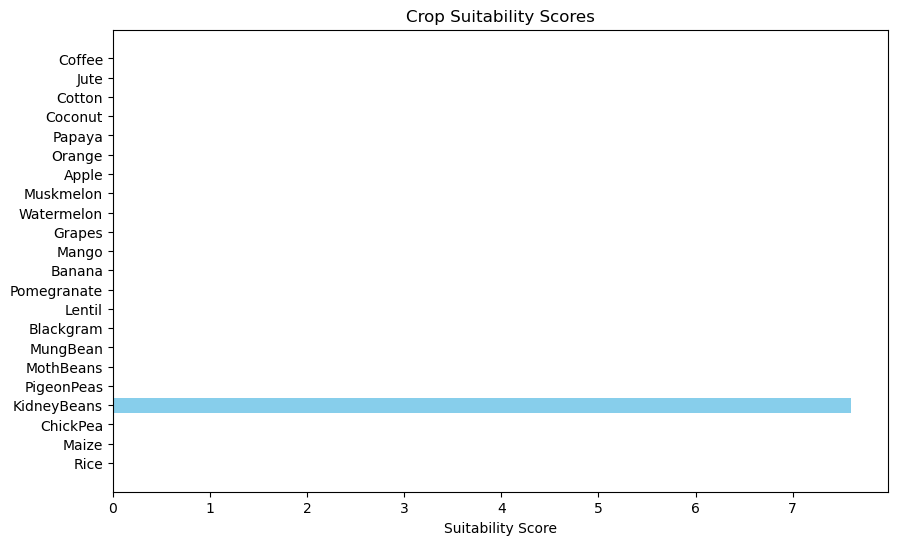

In [17]:
import matplotlib.pyplot as plt

# Visualize the membership functions for temperature, humidity, etc.
def plot_membership_functions():
    # Temperature
    temperature.view()
    plt.title("Temperature Membership Function")
    plt.show()

    # Humidity
    humidity.view()
    plt.title("Humidity Membership Function")
    plt.show()

    # pH
    ph.view()
    plt.title("pH Membership Function")
    plt.show()

    # Rainfall
    rainfall.view()
    plt.title("Rainfall Membership Function")
    plt.show()

    # N_soil
    n_soil.view()
    plt.title("N (Nitrogen) in Soil Membership Function")
    plt.show()

    # P_soil
    p_soil.view()
    plt.title("P (Phosphorus) in Soil Membership Function")
    plt.show()

    # K_soil
    k_soil.view()
    plt.title("K (Potassium) in Soil Membership Function")
    plt.show()

# Visualize the suitability scores for each crop
def plot_crop_suitability_scores(crop_scores):
    # Extract crop names and their scores
    crops = list(crop_scores.keys())
    scores = [crop_scores[crop] if crop_scores[crop] != "No Rule Applied" else 0 for crop in crops]

    # Plot crop scores
    plt.figure(figsize=(10, 6))
    plt.barh(crops, scores, color='skyblue')
    plt.xlabel('Suitability Score')
    plt.title('Crop Suitability Scores')
    plt.show()

# Call the plot functions
plot_membership_functions()
plot_crop_suitability_scores(crop_scores)
